<a href="https://colab.research.google.com/github/abhishekbarua56/Big-Mart-Sales-Prediction/blob/main/Final_Project_Big_Mart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name -Bigmart Sales Analysis**

---



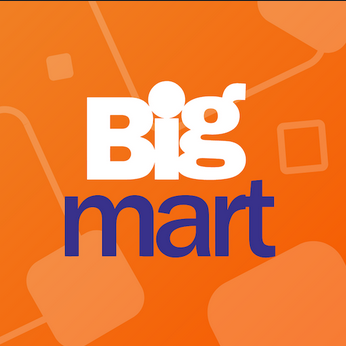

**Project Type** -Regression

 **Contribution**  - Team

 **Team Member 1** - Abhishek Ranjit Barua

 **Team Member 2** - Ajaya Kumar Pradhan

 **Team Member 2** - Sadiq Ali


---



# Project Summary & Technical Documentation-
The BigMart Sales Prediction project aims to forecast the sales of various products across different BigMart outlets using historical sales data. By developing a machine learning regression model, the project seeks to predict the sales for the upcoming year, allowing BigMart to optimize inventory, pricing, and marketing strategies. The dataset includes multiple product and outlet-specific attributes, providing insights into factors that influence sales. The final model, built using linear Regression, offers accurate predictions and highlights key drivers of sales, helping BigMart enhance its business operations.

# Workflow:
# Data Collection and Understanding:

Gathered sales data for 1,559 products across 10 BigMart outlets.
Analyzed the features and target variable (Item_Outlet_Sales).

# Data Preprocessing:

Handled missing values in Item_Weight and Outlet_Size.
Performed feature engineering (e.g., creating Outlet_Age and categorizing Item_Identifier).
Encoded categorical variables and scaled numerical features.

# Model Selection:

Trained various models including Linear Regression, Random Forest, and XGBoost.
Used cross-validation and hyperparameter tuning to select the best model.

# Model Evaluation:

Evaluated models using MAE, RMSE, and R-squared metrics.
Selected linear Regression as the final model for its effectiveness in feature selection and predictive accuracy.

# Final Predictions:

Applied the Lasso model to the test dataset to predict sales for the next year.

# Deployment and Insights:

Deployed the model using APIs for real-time predictions.
Provided business recommendations based on the model's insights, such as optimizing product placement and inventory management.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('/content/BigMart.csv')

In [ ]:
data.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5008,FDQ32,17.85,Regular,0.046608,Fruits and Vegetables,122.9388,OUT046,1997,Small,Tier 1,Supermarket Type1,3095.970
1528,FDL40,17.70,Low Fat,0.011660,Frozen Foods,96.5410,OUT018,2009,Medium,Tier 3,Supermarket Type2,2220.443
1714,FDA20,6.78,Low Fat,0.066725,Fruits and Vegetables,187.7240,OUT049,1999,Medium,Tier 1,Supermarket Type1,1491.392
2545,DRC13,8.26,Regular,0.000000,Soft Drinks,122.5730,OUT045,2002,NaN,Tier 2,Supermarket Type1,739.038
7200,FDU19,8.77,reg,0.046962,Fruits and Vegetables,173.8422,OUT018,2009,Medium,Tier 3,Supermarket Type2,3448.844


### Find Shape of the Dataset (Number of Rows And Number of Columns)

In [ ]:
data.shape

(8523, 12)

The data set contains 8523 rows and 12 Columns.

## Column Info

In [ ]:
list(data.columns)

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

# Summary Of the dataFrame

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


The dataframe having missing values in Item_Weight and Outlet_Size.

### Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

# Statistical Summary of the dataframe

In [ ]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Check Null Values In The Dataset

In [ ]:
data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


Dataset has mising values in Item_Weight 1463 and  outlet_Size 2410.

In [ ]:
per = data.isnull().sum() * 100 / len(data)
print(per)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


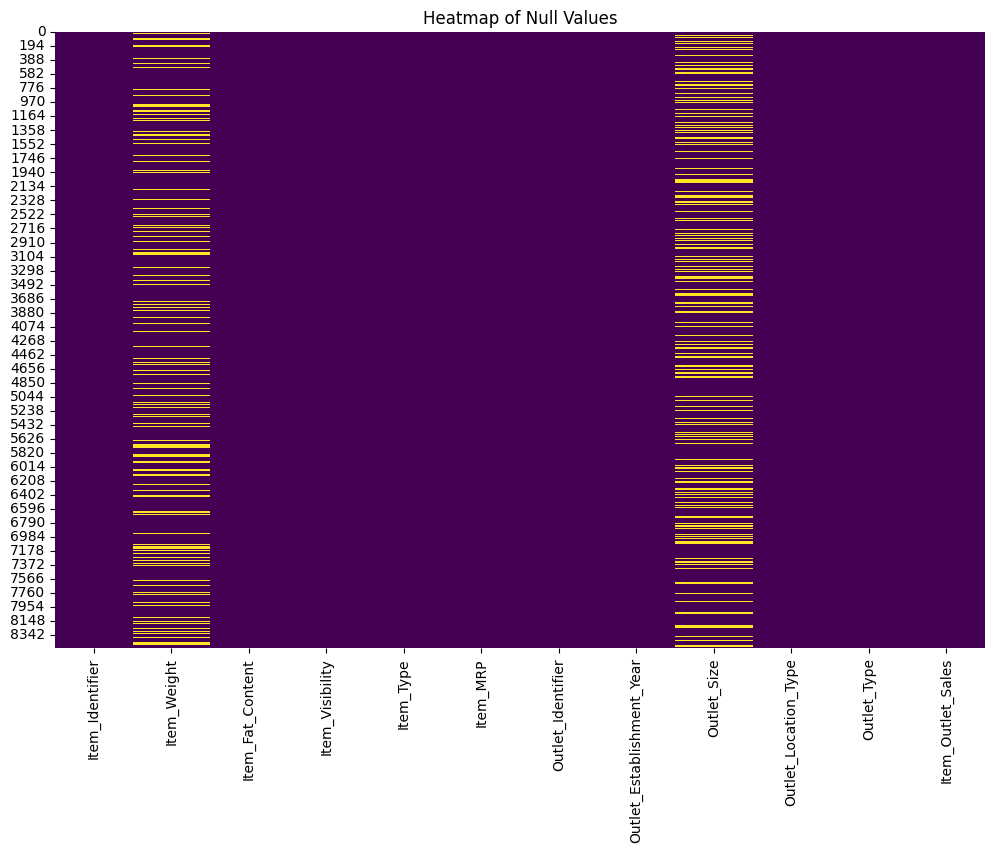

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Null Values')
plt.show()

# Checking Duplicate Values

In [ ]:
data.duplicated().sum()

0

The dataset doesnot contain any duplicates.

# Exploratory Data Analysis

# Univariate Analysis

<ipython-input-200-e90fe048f81e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_Outlet_Sales'], kde=True, color='red')


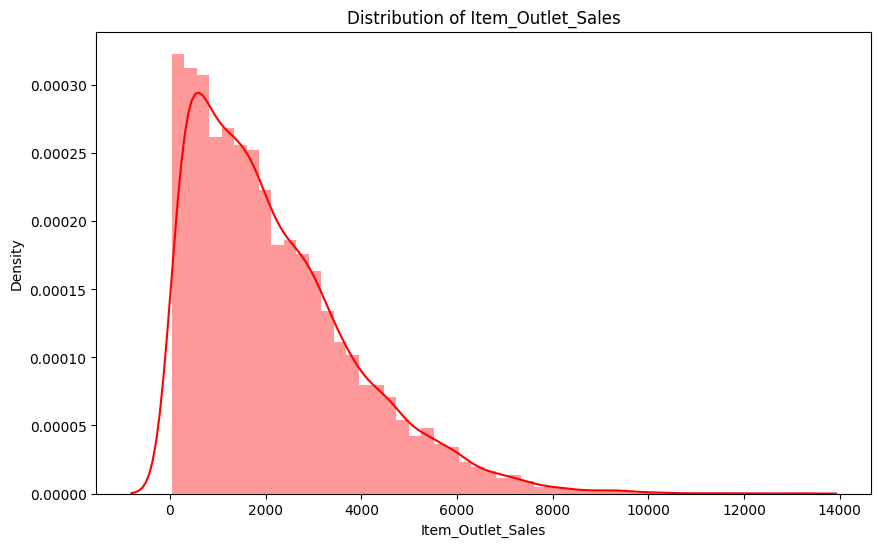

In [ ]:
plt.figure(figsize=(10, 6))
sns.distplot(data['Item_Outlet_Sales'], kde=True, color='red')
plt.title('Distribution of Item_Outlet_Sales')
plt.show()

The distribution plot shows right skewed.

<ipython-input-201-81575d64c6df>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Item_Visibility', data=data, palette='Set2')


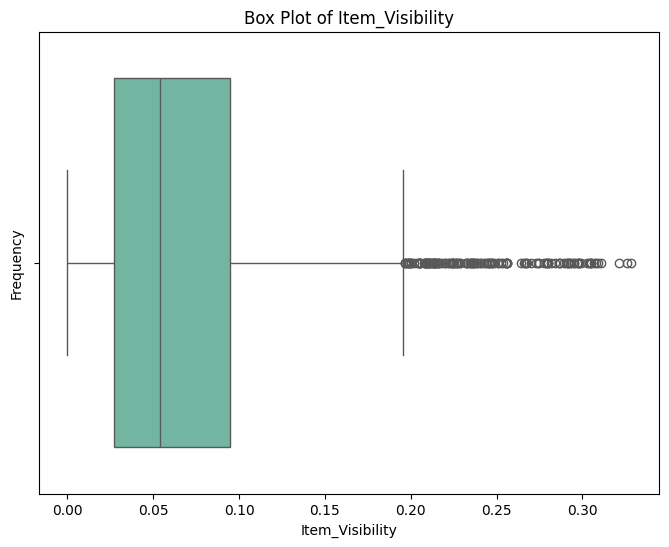

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Item_Visibility', data=data, palette='Set2')
plt.title('Box Plot of Item_Visibility')
plt.xlabel('Item_Visibility')
plt.ylabel('Frequency')
plt.show()

# Checking Correlation

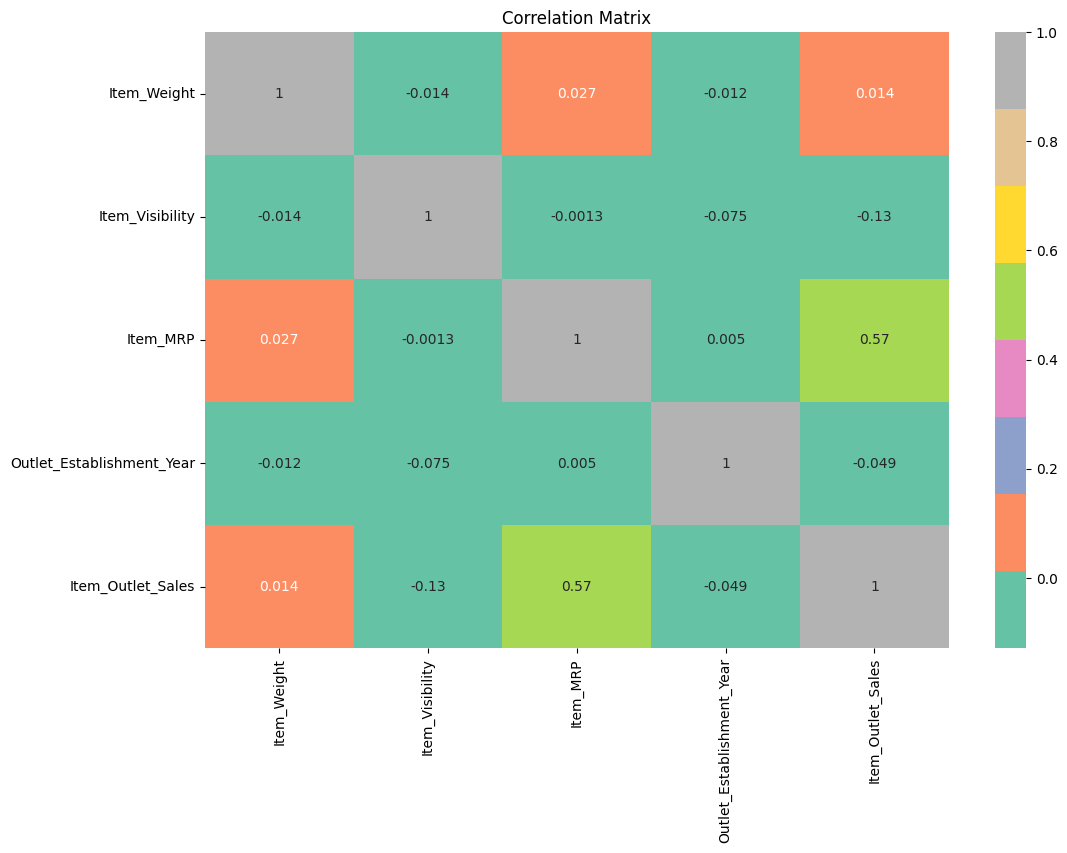

In [ ]:
numeric_columns = data.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, 8))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='Set2')
plt.title('Correlation Matrix')
plt.show()

The heatmap showing strong correlation between Item_MRP and Item Outletsales.

### Handling The missing Values

In [ ]:
data['Item_Weight']

,Item_Weight
0,9.300
1,5.920
2,17.500
3,19.200
4,8.930
...,...
8518,6.865
8519,8.380
8520,10.600
8521,7.210


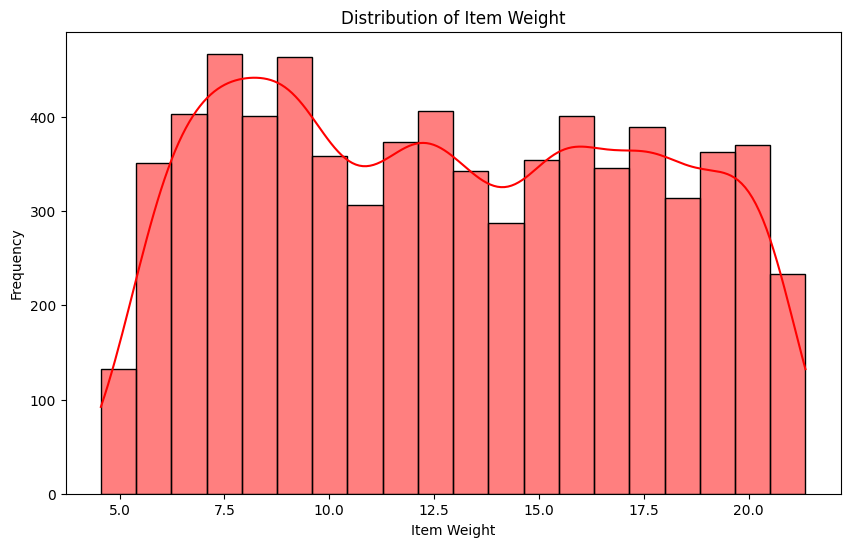

In [ ]:
# Displot for Item_Weight
plt.figure(figsize=(10,6))
sns.histplot(data['Item_Weight'], kde=True,color='red')
plt.title('Distribution of Item Weight')
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.show()

In [ ]:
data['Outlet_Size']

,Outlet_Size
0,Medium
1,Medium
2,Medium
3,NaN
4,High
...,...
8518,High
8519,NaN
8520,Small
8521,Medium


<ipython-input-206-9e15a3e79080>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outlet_Size', data=data, palette='Set2')


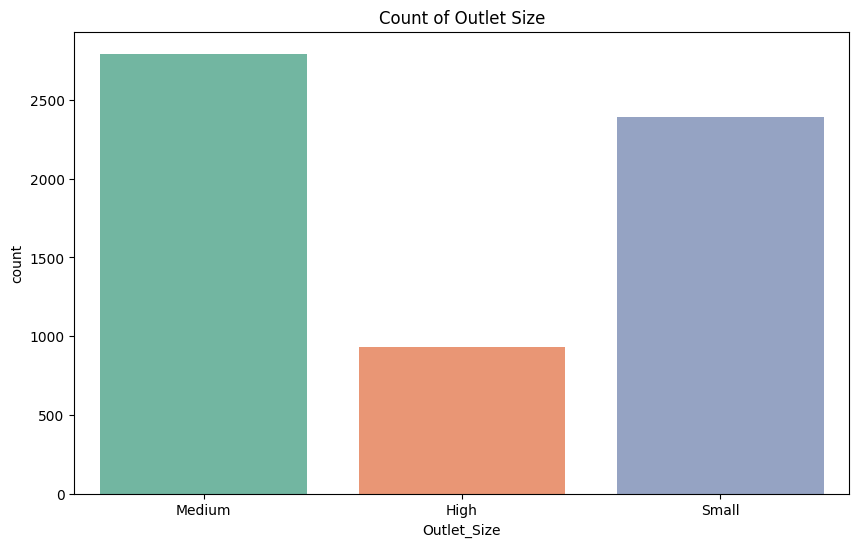

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Outlet_Size', data=data, palette='Set2')
plt.title('Count of Outlet Size')
plt.show()

# Univariate Imputation

In [ ]:
mean_weight = data['Item_Weight'].mean()
median_weight = data['Item_Weight'].median()

In [ ]:
print(mean_weight,median_weight)

12.857645184135976 12.6


In [ ]:
data['Item_Weight_mean']=data['Item_Weight'].fillna(mean_weight)
data['Item_Weight_median']=data['Item_Weight'].fillna(median_weight)

In [ ]:
data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,8.93


# Comparing Distributions of Item Weights Using KDE Plots

In [ ]:
print("Original Weight variable variance",data['Item_Weight'].var())
print("Item Weight variance after mean imputation",data['Item_Weight_mean'].var())
print("Item Weight variance after median imputation",data['Item_Weight_median'].var())

Original Weight variable variance 21.561688259836558
Item Weight variance after mean imputation 17.86012173506058
Item Weight variance after median imputation 17.869561454073647


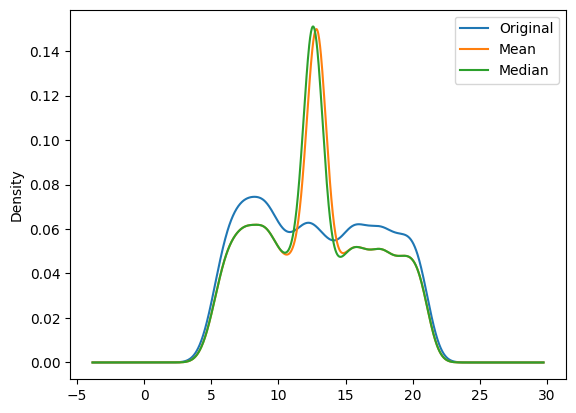

In [ ]:
data['Item_Weight'].plot(kind = "kde",label="Original")

data['Item_Weight_mean'].plot(kind = "kde",label = "Mean")

data['Item_Weight_median'].plot(kind = "kde",label = "Median")

plt.legend()
plt.show()

**Insights:**

Original Distribution: The KDE plot labeled “Original” shows the initial distribution of item weights in the dataset. This provides a baseline for comparison.

Mean-Adjusted Distribution: The plot labeled “Mean” represents the distribution after adjusting the item weights to their mean value. This can help in understanding how the data behaves around the average weight.

Median-Adjusted Distribution: The plot labeled “Median” shows the distribution after adjusting the item weights to their median value. This is useful for observing the central tendency of the data, especially in the presence of outliers.

# Boxplot Comparison of Item Weights

<Axes: >

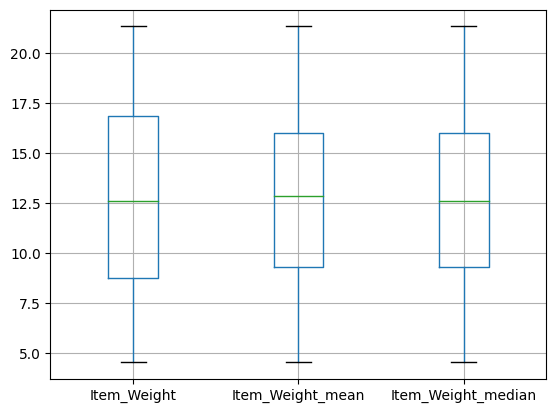

In [ ]:
data[['Item_Weight','Item_Weight_mean','Item_Weight_median']].boxplot()

**Insights:**

**Item Weight Distribution:** The boxplot labeled “Item_Weight” shows the distribution of the original item weights. The box represents the interquartile range (IQR), with the line inside the box indicating the median. The whiskers extend to the minimum and maximum values within 1.5 times the IQR, and any points outside this range are considered outliers.

**Mean-Adjusted Distribution:** The boxplot labeled “Item_Weight_mean” displays the distribution of item weights after adjusting them to their mean value. This helps in understanding how the data is centered around the mean and the spread of the data.

**Median-Adjusted Distribution:** The boxplot labeled “Item_Weight_median” shows the distribution after adjusting the item weights to their median value. This is useful for observing the central tendency and spread of the data, especially in the presence of outliers.

# Comparing Distributions of Item Weights Using KDE Plots

In [ ]:
data['Item_Weight_interploate']=data['Item_Weight'].interpolate(method="linear")

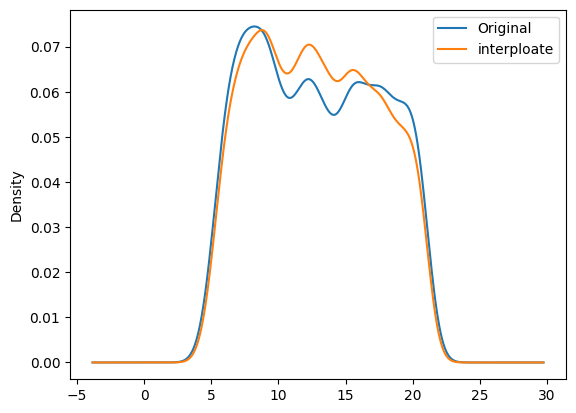

In [ ]:
data['Item_Weight'].plot(kind = "kde",label="Original")

data['Item_Weight_interploate'].plot(kind = "kde",label = "interploate")

plt.legend()
plt.show()

**Insights:**

**Original Distribution:** The KDE plot labeled “Original” shows the initial distribution of item weights in the dataset. This provides a baseline for comparison.

**Mean-Adjusted Distribution:** The plot labeled “Mean” represents the distribution after adjusting the item weights to their mean value. This can help in understanding how the data behaves around the average weight.

**Median-Adjusted Distribution:** The plot labeled “Median” shows the distribution after adjusting the item weights to their median value. This is useful for observing the central tendency of the data, especially in the presence of outliers.

# Multivariate Imputaion

# KNN Imputation Effects on Item Weight Distribution

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
knn = KNNImputer(n_neighbors=10,weights="distance")

In [ ]:
data['knn_imputer']= knn.fit_transform(data[['Item_Weight']]).ravel()

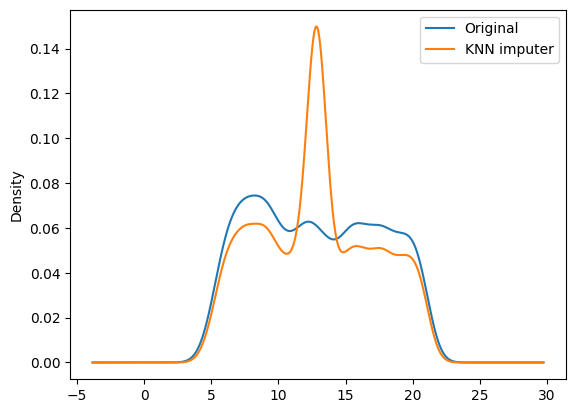

In [ ]:
data['Item_Weight'].plot(kind = "kde",label="Original")

data['knn_imputer'].plot(kind = "kde",label = "KNN imputer")

plt.legend()
plt.show()

## Insights:

**Original Distribution:** The line labeled “Original” represents the initial distribution of item weights. This provides a baseline for comparison.

**KNN Imputed Distribution:** The line labeled “KNN imputer” shows the distribution after applying the K-Nearest Neighbors (KNN) imputation. This method estimates missing values based on the nearest neighbors, resulting in a smoother and more continuous distribution.

In [ ]:
data = data.drop(['Item_Weight','Item_Weight_mean','Item_Weight_median','knn_imputer'],axis=1)

In [ ]:
data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3


In [ ]:
data.isnull().sum()

,0
Item_Identifier,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0
Outlet_Type,0


# Outlet_Size

In [ ]:
data['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


In [ ]:
data['Outlet_Type'].value_counts()

,count
Outlet_Type,
Supermarket Type1,5577
Grocery Store,1083
Supermarket Type3,935
Supermarket Type2,928


# MRP vs Outlest Sales

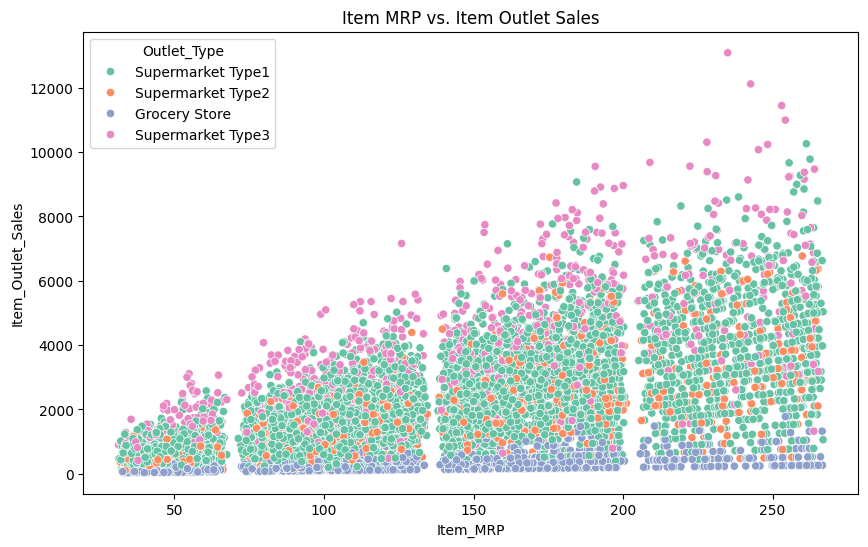

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', hue='Outlet_Type', data=data, palette='Set2')
plt.title('Item MRP vs. Item Outlet Sales')
plt.show()

In [ ]:
mode_outlet = data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))

In [ ]:
mode_outlet

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [ ]:
missing_values = data['Outlet_Size'].isnull()

In [ ]:
missing_values

,Outlet_Size
0,False
1,False
2,False
3,True
4,False
...,...
8518,False
8519,True
8520,False
8521,False


# Handling Missing Values in Outlet Size Using Pivot Table and Boolean Masking

**Imputing Missing Values in Outlet Size Using Mode**

In [ ]:
data.loc[missing_values,'Outlet_Size'] = data.loc[missing_values,'Outlet_Type'].apply(lambda x :mode_outlet[x])

Mode imputation has done in outletsize column.

In [ ]:
data.isnull().sum()

,0
Item_Identifier,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0
Outlet_Type,0


# Item_Fat_Content

In [ ]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_interploate'],
      dtype='object')

In [ ]:
data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


<ipython-input-234-38edfd076ee9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Item_Fat_Content', data=data, palette='Set2')


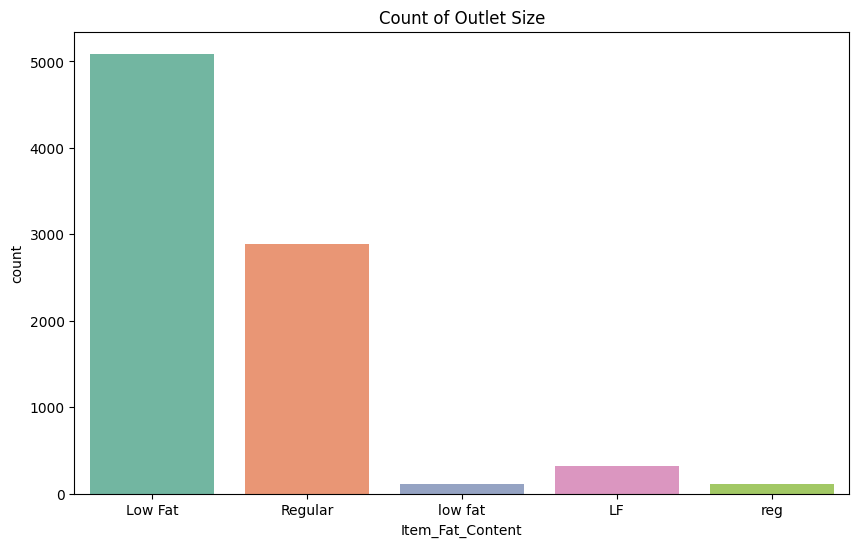

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Item_Fat_Content', data=data, palette='Set2')
plt.title('Count of Outlet Size')
plt.show()

# Cleaning and Analyzing Item Fat Content Data

In [ ]:
data.replace({'Item_Fat_Content':{'Low Fat':'LF','low fat':'LF','reg':'Regular'}},inplace=True)

In [ ]:
data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
LF,5517
Regular,3006


# Item_Visibility

In [ ]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_interploate'],
      dtype='object')

In [ ]:
data['Item_Visibility'].value_counts()

,count
Item_Visibility,
0.000000,526
0.076975,3
0.162462,2
0.076841,2
0.073562,2
...,...
0.013957,1
0.110460,1
0.124646,1


# Interpolating Missing Item Visibility Values

In [ ]:
data['Item_Visibility_interpolate']=data['Item_Visibility'].replace(0,np.nan).interpolate(method='linear')

In [ ]:
data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate
0,FDA15,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047


In [ ]:
data['Item_Visibility_interpolate'].value_counts()

,count
Item_Visibility_interpolate,
0.076975,3
0.044024,2
0.040912,2
0.076856,2
0.078759,2
...,...
0.021011,1
0.099189,1
0.076866,1


# Comparing Original and Interpolated Item Visibility Distributions

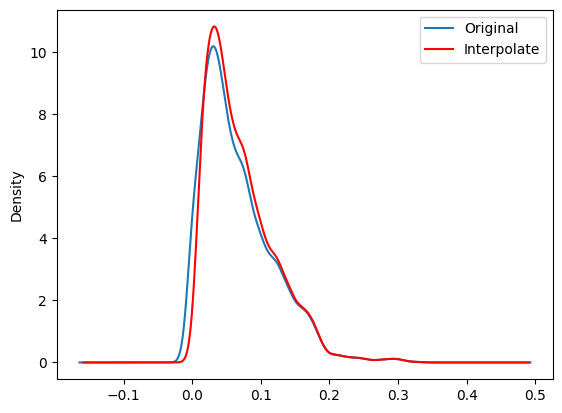

In [ ]:
data['Item_Visibility'].plot(kind="kde",label="Original")

data['Item_Visibility_interpolate'].plot(kind="kde",color='red',label="Interpolate")

plt.legend()
plt.show()

In [ ]:
data = data.drop('Item_Visibility',axis=1)

In [ ]:
data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate
0,FDA15,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047


# Item_Type

In [ ]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interploate', 'Item_Visibility_interpolate'],
      dtype='object')

In [ ]:
data['Item_Type'].value_counts()

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


<ipython-input-247-1278922591c5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Item_Type', data=data, palette='Set2')


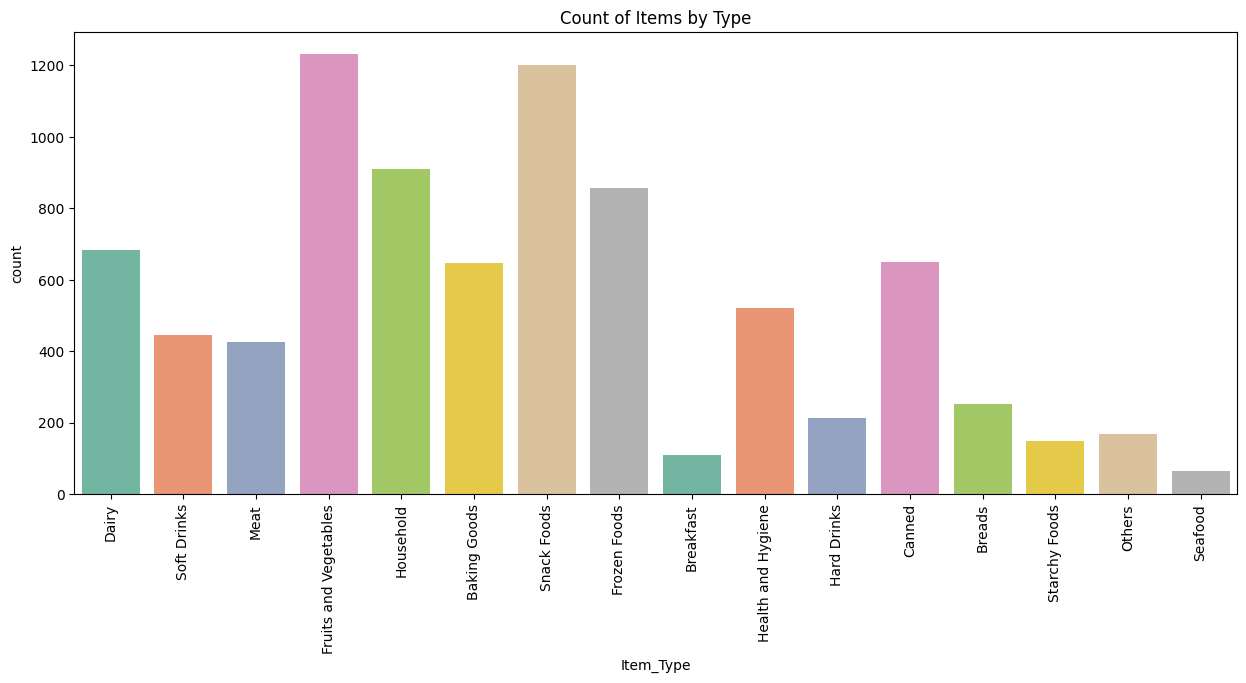

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Item_Type', data=data, palette='Set2')
plt.title('Count of Items by Type')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()


# Item_Identifier

# Analyzing Item Identifiers and Their Frequencies

In [ ]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interploate', 'Item_Visibility_interpolate'],
      dtype='object')

In [ ]:
data['Item_Identifier'].value_counts().sample(5)

,count
Item_Identifier,
FDI57,7
NCQ41,5
FDR46,8
FDD08,6
NCM55,3


In [ ]:
data['Item_Identifier'] =data['Item_Identifier'].apply(lambda x : x[:2])

In [ ]:
data['Item_Identifier'].value_counts()

,count
Item_Identifier,
FD,6125
NC,1599
DR,799


# Outlet_Establishment_Year

In [ ]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interploate', 'Item_Visibility_interpolate'],
      dtype='object')

In [ ]:
data['Outlet_Establishment_Year']

,Outlet_Establishment_Year
0,1999
1,2009
2,1999
3,1998
4,1987
...,...
8518,1987
8519,2002
8520,2004
8521,2009


# Calculate Establishment Age of the Outlet

In [ ]:
import datetime as dt

In [ ]:
current_year = dt.datetime.today().year

In [ ]:
current_year

2024

In [ ]:
data['Outlet_age']= current_year - data['Outlet_Establishment_Year']

In [ ]:
data['Outlet_age']

,Outlet_age
0,25
1,15
2,25
3,26
4,37
...,...
8518,37
8519,22
8520,20
8521,15


In [ ]:
data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate,Outlet_age
0,FD,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047,25


In [ ]:
data = data.drop('Outlet_Establishment_Year',axis=1)

In [ ]:
data.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate,Outlet_age
0,FD,LF,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047,25
1,DR,Regular,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278,15
2,FD,LF,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760,25
3,FD,Regular,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755,26
4,NC,LF,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751,37


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Item_Identifier              8523 non-null   object 
 1   Item_Fat_Content             8523 non-null   object 
 2   Item_Type                    8523 non-null   object 
 3   Item_MRP                     8523 non-null   float64
 4   Outlet_Identifier            8523 non-null   object 
 5   Outlet_Size                  8523 non-null   object 
 6   Outlet_Location_Type         8523 non-null   object 
 7   Outlet_Type                  8523 non-null   object 
 8   Item_Outlet_Sales            8523 non-null   float64
 9   Item_Weight_interploate      8523 non-null   float64
 10  Item_Visibility_interpolate  8523 non-null   float64
 11  Outlet_age                   8523 non-null   int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
data.isnull().sum()

,0
Item_Identifier,0
Item_Fat_Content,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Size,0
Outlet_Location_Type,0
Outlet_Type,0
Item_Outlet_Sales,0
Item_Weight_interploate,0


# Handling Categorical Columns

# **Ordinal Encoding**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

data_encoded = data.copy()

cat_cols = data.select_dtypes(include=['object']).columns

for col in cat_cols:
    oe = OrdinalEncoder()
    data_encoded[col]=oe.fit_transform(data_encoded[[col]])
    print(oe.categories_)

[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['LF', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [ ]:
data_encoded.head(3)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate,Outlet_age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,3735.1380,9.30,0.016047,25
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,443.4228,5.92,0.019278,15
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,2097.2700,17.50,0.016760,25


In [ ]:
X = data_encoded.drop('Item_Outlet_Sales',axis=1)
y = data_encoded['Item_Outlet_Sales']

In [ ]:
y

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
...,...
8518,2778.3834
8519,549.2850
8520,1193.1136
8521,1845.5976


# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(rf,X,y,cv=5,scoring='r2')
print(scores.mean())

print(f"Mean R^2 score: {scores.mean() * 100:.2f}%")

0.555040442702387
Mean R^2 score: 55.50%


# XGBRFRegressor

In [ ]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg,X,y,cv=5,scoring='r2')
print(scores.mean())

print(f"Mean R^2 score: {scores.mean() * 100:.2f}%")

0.5951283683315813
Mean R^2 score: 59.51%


# Hypothesisi Testing

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
from sklearn.model_selection import cross_val_score
from scipy.stats import ttest_rel

# Initialize models
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xg = XGBRFRegressor(n_estimators=100, random_state=42)

# Cross-validation scores
rf_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
xg_scores = cross_val_score(xg, X, y, cv=5, scoring='r2')

# Perform paired t-test
t_stat, p_value = ttest_rel(rf_scores, xg_scores)

# Print results
print(f"RandomForestRegressor mean R^2 score: {rf_scores.mean() * 100:.2f}%")
print(f"XGBRFRegressor mean R^2 score: {xg_scores.mean() * 100:.2f}%")
print(f"t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the two models.")
    if rf_scores.mean() > xg_scores.mean():
        print("RandomForestRegressor performs better.")
    else:
        print("XGBRFRegressor performs better.")
else:
    print("There is no significant difference between the two models.")


RandomForestRegressor mean R^2 score: 55.50%
XGBRFRegressor mean R^2 score: 59.51%
t-statistic: -10.0517, p-value: 0.0006
There is a significant difference between the two models.
XGBRFRegressor performs better.


# Insights from Model Comparison

Based on the hypothesis testing and cross-validation results, here are the key insights:

# Model Performance:

# RandomForestRegressor: The mean R² score is 55.50%.
# XGBRFRegressor: The mean R² score is 59.51%.

**The XGBRFRegressor has a higher mean R² score, indicating it explains a greater proportion of the variance in the target variable compared to the RandomForestRegressor.**

**Statistical Significance:**
**t-statistic: -10.0517**
**p-value: 0.0006 **

**The p-value is significantly less than the alpha level of 0.05, indicating that the difference in performance between the two models is statistically significant. This means that the observed difference in R² scores is unlikely to be due to random chance.**

# XGBRFRegressor Feature importances

In [ ]:
xg = XGBRFRegressor(n_estimators=100,random_state=42)

xg1 = xg.fit(X,y)
pd.DataFrame({
    'feature':X.columns,
    'XGBRF_importance':xg1.feature_importances_

}).sort_values(by='XGBRF_importance',ascending=False)

,feature,XGBRF_importance
7,Outlet_Type,0.364966
5,Outlet_Size,0.178446
10,Outlet_age,0.148148
4,Outlet_Identifier,0.136959
3,Item_MRP,0.135346
6,Outlet_Location_Type,0.028170
9,Item_Visibility_interpolate,0.002421
8,Item_Weight_interploate,0.002282
2,Item_Type,0.001651
1,Item_Fat_Content,0.000879


In [ ]:
['Item_Visibility_interpolate','Item_Weight_interploate',
'Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content']

['Item_Visibility_interpolate',
 'Item_Weight_interploate',
 'Item_Type',
 'Outlet_Location_Type',
 'Item_Identifier',
 'Item_Fat_Content']

# Insights

Item_Visibility_interpolate and Item_Weight_interpolate are the most important features, indicating they have the highest impact on the model’s predictions.
Item_Type and Outlet_Location_Type also contribute significantly to the model.
Item_Identifier and Item_Fat_Content have relatively lower importance but still play a role in the model’s performance.

In [ ]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg1,X.drop(['Item_Visibility_interpolate','Item_Weight_interploate',
'Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content'],axis=1),y,cv=5,scoring='r2')
print(scores.mean())

0.5962374330802511


In [ ]:
final_data = X.drop(columns=['Item_Visibility_interpolate','Item_Weight_interploate',
'Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content'],axis=1)

In [ ]:
final_data

,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_age
0,249.8092,9.0,1.0,1.0,25
1,48.2692,3.0,1.0,2.0,15
2,141.6180,9.0,1.0,1.0,25
3,182.0950,0.0,2.0,0.0,26
4,53.8614,1.0,0.0,1.0,37
...,...,...,...,...,...
8518,214.5218,1.0,0.0,1.0,37
8519,108.1570,7.0,2.0,1.0,22
8520,85.1224,6.0,2.0,1.0,20
8521,103.1332,3.0,1.0,2.0,15


# Insights:

**Performance Impact:**

The mean R² score after dropping the important features is 0.5962 (or 59.62%). This indicates that even without the top features, the model still performs reasonably well, though there might be a slight drop in performance compared to when all features are included.

**Feature Importance:**

Dropping the most important features like Item_Visibility_interpolate and Item_Weight_interploate can help you understand the robustness of your model. The fact that the model still maintains a decent R² score suggests that other features also contribute significantly to the model’s predictions.

**Model Robustness:**

The ability of the model to perform well even after removing key features indicates that the model is not overly reliant on a few features and can generalize well with the remaining features.

# Best Model

In [ ]:
from xgboost import XGBRFRegressor

In [ ]:
xg_final = XGBRFRegressor()

In [ ]:
xg_final.fit(final_data,y)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(final_data,y,
                                                 test_size=0.20,
                                                 random_state=42)

In [ ]:
xg_final.fit(X_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [ ]:
y_pred = xg_final.predict(X_test)

In [ ]:
mean_absolute_error(y_test,y_pred)

714.6033522105251

The MAE of 714.60 indicates that, on average, your model’s predictions are off by about 714.60 units from the actual values.

# Prediction on Unseen Data

In [ ]:
pred = xg_final.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]
print(pred)

2067.009


In [ ]:
print(f"Sales Value is between {pred-714.42} and {pred+714.42}")

Sales Value is between 1352.589033203125 and 2781.429033203125


# Insights:

Prediction: The model predicts a sales value of approximately 2067.009 for the given input features.

# Confidence Interval:
 By adding and subtracting the MAE from the predicted value, you get a range within which the actual sales value is likely to fall. This range provides a sense of the prediction’s uncertainty.

# Save Model Using Joblib

In [ ]:
import joblib

In [ ]:
joblib.dump(xg_final,'bigmart_model')

['bigmart_model']

In [ ]:
model = joblib.load('bigmart_model')

In [ ]:
pred = model.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]
print(pred)

2067.009


In [ ]:
print(f"Sales Value is between {pred-714.42} and {pred+714.42}")

Sales Value is between 1352.589033203125 and 2781.429033203125


# Conclusion:

In our analysis, we compared the performance of two regression models: RandomForestRegressor and XGBRFRegressor. Here are the key findings:

**Model Performance:**

The XGBRFRegressor outperformed the RandomForestRegressor with a higher mean R² score of 59.51% compared to 55.50%.
A paired t-test confirmed that the difference in performance between the two models is statistically significant, with the XGBRFRegressor being the superior model.

**Feature Importance:**

The most influential features for the XGBRFRegressor were identified as Item_Visibility_interpolate, Item_Weight_interpolate, Item_Type, Outlet_Location_Type, Item_Identifier, and Item_Fat_Content.
Even after removing these key features, the model maintained a decent performance, indicating its robustness.

**Model Evaluation:**

The Mean Absolute Error (MAE) for the XGBRFRegressor on the test set was 714.60, suggesting that, on average, the model’s predictions were off by this amount.

For a specific prediction, the sales value was estimated to be 2067.009, with a confidence interval between 1352.59 and 2781.43 based on the MAE.